In [3]:
# general
import pandas as pd
import numpy as np
import os
import pickle
import time
import matplotlib.pyplot as plt

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#import sys
#!{sys.executable} -m pip install -i http://172.16.114.36/simple --trusted-host=172.16.114.36 cloudpickle

In [4]:
header_text = 't1.data_code,t1.da_date,t2.em1,t2.em2,t2.em3,t2.em4,t2.em5,t2.em6,t2.em7,t2.em8,t2.em9,t1."101",t1."102",t1."103",t1."104",t1."105",t1."106",t1."107",t1."108",t1."109",t1."110",t1."111",t1."112",t1."113",t1."114",t1."115",t1."116",t1."117",t1."118",t1."119",t1."120",t1."121",t1."122",t1."123",t1."124",t1."125",t1."126",t1."127",t1."128",t1."129",t1."130",t1."131",t1."132",t1."133",t1."134",t1."135",t1."136",t1."137",t1."138",t1."139",t1."140",t1."141",t1."142",t1."143",t1."144",t1."145",t1."146",t1."147",t1."148",t1."149",t1."150",t1."151",t1."152",t1."153",t1."154",t1."155",t1."156",t1."157",t1."158",t1."159",t1."160",t1."161",t1."162",t1."163",t1."164",t1."165",t1."166",t1."167",t1."168",t1."169",t1."170",t1."171",t1."172",t1."173",t1."174",t1."175",t1."176",t1."177",t1."178",t1."179",t1."180",t1."181",t1."182",t1."183",t1."184",t1."185",t1."186",t1."187",t1."188",t1."189",t1."190",t1."191",t1."192",t1."193",t1."194",t1."195",t1."196",t1."197",t1."198",t1."199",t1."200",t1."201",t1."202",t1."203",t1."204",t1."205",t1."206",t1."207",t1."208",t1."209",t1."210",t1."211",t1."212",t1."213",t1."214",t1."215",t1."216",t1."217",t1."218",t1."219",t1."220",t1."221",t1."222",t1."223",t1."224",t1."225",t1."226",t1."227",t1."228",t1."229",t1."230",t1."231",t1."232",t1."233",t1."234",t1."235",t1."236",t1."237",t1."238",t1."239",t1."240",t1."241",t1."242",t1."243",t1."244",t1."245",t1."246",t1."247",t1."248",t1."249",t1."250",t1."251",t1."252",t1."253",t1."254",t1."255",t1."256",t1."257",t1."258",t1."259",t1."260",t1."261",t1."262",t1."263",t1."264",t1."265",t1."266",t1."267",t1."268",t1."269",t1."270",t1."271",t1."272",t1."273",t1."274",t1."275",t1."276",t1."277",t1."278",t1."279",t1."280",t1."281",t1."282",t1."283",t1."284",t1."285",t1."286",t1."287",t1."288",t1."289",t1."290",t1."291",t1."292",t1."293",t1."294",t1."295",t1."296",t1."297",t1."298",t1."299",t1."300",t1."301",t1."302",t1."303",t1."304",t1."305",t1."306",t1."307",t1."308",t1."309",t1."310",t1."311",t1."312",t1."313",t1."314",t1."315",t1."316",t1."317",t1."318",t1."319",t1."320",t1."321",t1."322",t1."323",t1."324",t1."325",t1."326",t1."327",t1."328",t1."329",t1."330",t1."331",t1."332",t1."333",t1."334",t1."335",t1."336",t1."337",t1."338",t1."339",t1."340",t1."341",t1."342",t1."343",t1."344",t1."345",t1."346",t1."347",t1."348",t1."349",t1."350",t1."351",t1."352",t1."353",t1."354",t1."355",t1."356",t1."357",t1."358",t1."359",t1."360",t1."361",t1."362",t1."363",t1."364",t1."365",t1."366",t1."367",t1."368",t1."369",t1."370",t1."371",t1."372",t1."373",t1."374",t1."375",t1."376",t1."377",t1."378",t1."379",t1."380",t1."381",t1."382",t1."383",t1."384",t1."385",t1."386",t1."387",t1."388",t1."389",t1."390",t1."391",t1."392",t1."393",t1."394",t1."395",t1."396",t1."397",t1."398",t1."399",t1."400",t1."401",t1."402",t1."403",t1."404",t1."405",t1."406",t1."407",t1."408",t1."409",t1."410",t1."411",t1."412",t1."413",t1."414",t1."415",t1."416",t1."417",t1."418",t1."419",t1."420",t1."421",t1."422",t1."423",t1."424",t1."425",t1."426",t1."427",t1."428",t1."429",t1."430",t1."431",t1."432",t1."433",t1."434",t1."435",t1."436",t1."437",t1."438",t1."439",t1."440",t1."441",t1."442",t1."443",t1."444",t1."445",t1."446",t1."447",t1."448",t1."449",t1."450",t1."451",t1."452",t1."453",t1."454",t1."455",t1."456",t1."457",t1."458",t1."459",t1."460",t1."461",t1."462",t1."463",t1."464",t1."465",t1."466",t1."467",t1."468",t1."469",t1."470",t1."471",t1."472",t1."473",t1."474",t1."475",t1."476",t1."477",t1."478",t1."479",t1."480",t1."481",t1."482",t1."483",t1."484",t1."485",t1."486",t1."487",t1."488",t1."489",t1."490",t1."491",t1."492",t1."493",t1."494",t1."495",t1."496",t1."497",t1."498",t1."499",t1."500",t1."501",t1."502",t1."503",t1."504",t1."505",t1."506",t1."507",t1."508",t1."509",t1."510",t1."511",t1."512",t1."513",t1."514",t1."515",t1."516",t1."517",t1."518",t1."519",t1."520",t1."521",t1."522",t1."523",t1."524",t1."525",t1."526",t1."527",t1."528",t1."529",t1."530",t1."531",t1."532",t1."533",t1."534",t1."535",t1."536",t1."537",t1."538",t1."539",t1."540",t1."541",t1."542",t1."543",t1."544",t1."545",t1."546",t1."547",t1."548",t1."549",t1."550",t1."551",t1."552",t1."553",t1."554",t1."555",t1."556",t1."557",t1."558",t1."559",t1."560",t1."561",t1."562",t1."563",t1."564",t1."565",t1."566",t1."567",t1."568",t1."569",t1."570",t1."571",t1."572",t1."573",t1."574",t1."575",t1."576",t1."577",t1."578",t1."579",t1."580",t1."581",t1."582",t1."583",t1."584",t1."585",t1."586",t1."587",t1."588",t1."589",t1."590",t1."591",t1."592",t1."593",t1."594",t1."595",t1."596",t1."597",t1."598",t1."599",t1."600",t1."601",t1."602",t1."603",t1."604",t1."605",t1."606",t1."607",t1."608",t1."609",t1."610",t1."611",t1."612",t1."613",t1."614",t1."615",t1."616",t1."617",t1."618",t1."619",t1."620",t1."621",t1."622",t1."623",t1."624",t1."625",t1."626",t1."627",t1."628",t1."629",t1."630",t1."631",t1."632",t1."633",t1."634",t1."635",t1."636",t1."637",t1."638",t1."639",t1."640",t1."641",t1."642",t1."643",t1."644",t1."645",t1."646",t1."647",t1."648",t1."649",t1."650",t1."651",t1."652",t1."653",t1."654",t1."655",t1."656",t1."657",t1."658",t1."659",t1."660",t1."661",t1."662",t1."663",t1."664",t1."665",t1."666",t1."667",t1."668",t1."669",t1."670",t1."671",t1."672",t1."673",t1."674",t1."675",t1."676",t1."677",t1."678",t1."679",t1."680",t1."681",t1."682",t1."683",t1."684",t1."685",t1."686",t1."687",t1."688",t1."689",t1."690",t1."691",t1."692",t1."693",t1."694",t1."695",t1."696",t1."697",t1."698",t1."699",t1."700",t1."701",t1."702",t1."703",t1."704",t1."705",t1."706",t1."707",t1."708",t1."709",t1."710",t1."711",t1."712",t1."713",t1."714",t1."715",t1."716",t1."717",t1."718",t1."719",t1."720",t1."721",t1."722",t1."723",t1."724",t1."725",t1."726",t1."727",t1."728",t1."729",t1."730",t1."731",t1."732",t1."733",t1."734",t1."735",t1."736",t1."737",t1."738",t1."739",t1."740",t1."741",t1."742",t1."743",t1."744",t1."745",t1."746",t1."747",t1."748",t1."749",t1."750",t1."751",t1."752",t1."753",t1."754",t1."755",t1."756",t1."757",t1."758",t1."759",t1."760",t1."761",t1."762",t1."763",t1."764",t1."765",t1."766",t1."767",t1."768",t1."769",t1."770",t1."771",t1."772",t1."773",t1."774",t1."775",t1."776",t1."777",t1."778",t1."779",t1."780",t1."781",t1."782",t1."783",t1."784",t1."785",t1."786",t1."787",t1."788",t1."789",t1."790",t1."791",t1."792",t1."793",t1."794",t1."795",t1."796",t1."797",t1."798",t1."799",t1."800",t1."801",t1."802",t1."803",t1."804",t1."805",t1."806",t1."807",t1."808",t1."809",t1."810",t1."811",t1."812",t1."813",t1."814",t1."815",t1."816",t1."817",t1."818",t1."819",t1."820",t1."821",t1."822",t1."823",t1."824",t1."825",t1."826",t1."827",t1."828",t1."829",t1."830",t1."831",t1."832",t1."833",t1."834",t1."835",t1."836",t1."837",t1."838",t1."839",t1."840",t1."841",t1."842",t1."843",t1."844",t1."845",t1."846",t1."847",t1."848",t1."849",t1."850",t1."851",t1."852",t1."853",t1."854",t1."855",t1."856",t1."857",t1."858",t1."859",t1."860",t1."861",t1."862",t1."863",t1."864",t1."865",t1."866",t1."867",t1."868",t1."869",t1."870",t1."871",t1."872",t1."873",t1."874",t1."875",t1."876",t1."877",t1."878",t1."879",t1."880",t1."881",t1."882",t1."883",t1."884",t1."885",t1."886",t1."887",t1."888",t1."889",t1."890",t1."891",t1."892",t1."893",t1."894",t1."895",t1."896",t1."897",t1."898",t1."899",t1."900",t1."901",t1."902",t1."903",t1."904",t1."905",t1."906",t1."907",t1."908",t1."909",t1."910",t1."911",t1."912",t1."913",t1."914",t1."915",t1."916",t1."917",t1."918",t1."919",t1."920",t1."921",t1."922",t1."923",t1."924",t1."925",t1."926",t1."927",t1."928",t1."929",t1."930",t1."931",t1."932",t1."933",t1."934",t1."935",t1."936",t1."937",t1."938",t1."939",t1."940",t1."941",t1."942",t1."943",t1."944",t1."945",t1."946",t1."947",t1."948",t1."949",t1."950",t1."951",t1."952",t1."953",t1."954",t1."955",t1."956",t1."957",t1."958",t1."959",t1."960",t1."961",t1."962",t1."963",t1."964",t1."965",t1."966",t1."967",t1."968",t1."969",t1."970",t1."971",t1."972",t1."973",t1."974",t1."975",t1."976",t1."977",t1."978",t1."979",t1."980",t1."981",t1."982",t1."983",t1."984",t1."985",t1."986",t1."987",t1."988",t1."989",t1."990",t1."991",t1."992",t1."993",t1."994",t1."995",t1."996",t1."997",t1."998",t1."999",t3.exo_0_1,t3.exo_0_2,t3.exo_0_3,t3.exo_0_4,t3.exo_0_5,t3.exo_0_6,t3.exo_0_7,t3.exo_01,t3.exo_02,t3.exo_03,t3.exo_04,t3.exo_05,t3.exo_06,t3.exo_07,t3.exo_08,t3.exo_09,t3.exo_10,t3.exo_11,t3.exo_12,t3.exo_13,t3.exo_14,t3.exo_15,t3.exo_16,t3.exo_17,t3.exo_18,t3.exo_19,t3.exo_20,t3.exo_21,t3.exo_22,t3.exo_23,t3.exo_24,t3.exo_25,t3.exo_26,t3.exo_27,t3.exo_28,t3.exo_29,t3.exo_30,t3.exo_31,t3.exo_32,t3.exo_33,t3.exo_34,t3.exo_35,t3.exo_36,t3.exo_37'
header = header_text.split(',')

#df_first = pd.read_csv('./amt_data_sample9_two_year.csv', sep='|', header=None)
df_first = pd.read_csv('../180817/amt_data_sample9_two_year_var2.csv', sep='|', names=header)



######################################
# 테스트용
######################################
# df_first = pd.read_csv('./birthdayparty.txt', sep=',', names=header)

# import dask.dataframe as dd
# df_first = dd.read_csv("./amt_data_sample9_two_year_var2.csv", sep='|', names=header)

In [5]:
df_first.replace(np.nan, 0, inplace=True)
#df_first = df_first.fillna(0)
#df_first = df_first.head(4800)

In [6]:
df_first=df_first.rename(columns={"t1.data_code":"기업고유번호", "t1.da_date":'Mth'})
#df_first=df_first.rename(columns={0:"기업고유번호", 1:'Mth'})

In [7]:
df_first = df_first.head(4800)

In [8]:
col = df_first.columns

#각 칼럼별로 칼럼값이 0인 비율
i = 0
for col in col :
    a = np.array(df_first[col]).tolist().count(0)
    print('number of zeros in {} : {}%, {}'.format(col, int(a/len(df_first)*100), i))
    i+=1
    
#8번열이 매출... 마이너스일 수 있나

number of zeros in 기업고유번호 : 0%, 0
number of zeros in Mth : 0%, 1
number of zeros in t2.em1 : 83%, 2
number of zeros in t2.em2 : 83%, 3
number of zeros in t2.em3 : 81%, 4
number of zeros in t2.em4 : 81%, 5
number of zeros in t2.em5 : 81%, 6
number of zeros in t2.em6 : 81%, 7
number of zeros in t2.em7 : 81%, 8
number of zeros in t2.em8 : 81%, 9
number of zeros in t2.em9 : 99%, 10
number of zeros in t1."101" : 4%, 11
number of zeros in t1."102" : 97%, 12
number of zeros in t1."103" : 0%, 13
number of zeros in t1."104" : 92%, 14
number of zeros in t1."105" : 79%, 15
number of zeros in t1."106" : 94%, 16
number of zeros in t1."107" : 91%, 17
number of zeros in t1."108" : 69%, 18
number of zeros in t1."109" : 95%, 19
number of zeros in t1."110" : 91%, 20
number of zeros in t1."111" : 97%, 21
number of zeros in t1."112" : 55%, 22
number of zeros in t1."113" : 93%, 23
number of zeros in t1."114" : 87%, 24
number of zeros in t1."115" : 99%, 25
number of zeros in t1."116" : 62%, 26
number of zer

In [ ]:
# df_test1 = df_first.groupby('업종코드').count()['기업고유번호']
# df_test1.head(30)

In [ ]:
#df_test1.sort_values(['기업고유번호'],ascending=False).head(3)
# df_test1.sort_values(ascending=False).head(5)

In [9]:
매출합계 = None

매출합계 = (df_first["t1.\"401\""] - df_first["t1.\"402\""] - df_first["t1.\"403\""]) +\
        (df_first["t1.\"404\""] - df_first["t1.\"405\""] - df_first["t1.\"406\""]) +\
        (df_first["t1.\"407\""] - df_first["t1.\"408\""]) +\
        (df_first["t1.\"409\""] - df_first["t1.\"410\""])

df_first["매출"] = 매출합계

print(df_first.columns[np.r_[310:331]]) # 제거 할 컬럼 확인
df_first = df_first.drop(df_first.columns[np.r_[310:331]], axis=1) # 308번 인덱스부터 407번 인덱스까지 날림

df_first.head(30)

Index(['t1."400"', 't1."401"', 't1."402"', 't1."403"', 't1."404"', 't1."405"',
       't1."406"', 't1."407"', 't1."408"', 't1."409"', 't1."410"', 't1."411"',
       't1."412"', 't1."413"', 't1."414"', 't1."415"', 't1."416"', 't1."417"',
       't1."418"', 't1."419"', 't1."420"'],
      dtype='object')


,기업고유번호,Mth,t2.em1,t2.em2,t2.em3,t2.em4,t2.em5,t2.em6,t2.em7,t2.em8,...,t3.exo_29,t3.exo_30,t3.exo_31,t3.exo_32,t3.exo_33,t3.exo_34,t3.exo_35,t3.exo_36,t3.exo_37,매출
0,APO1000149,201601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,873.32,269.59,29.92,61.74,473.21,11.25,130.57,117.01,2867.13,9547635
1,APO1000149,201602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,872.99,264.33,31.16,59.26,462.48,10.86,130.70,116.45,2809.25,44174265
2,APO1000149,201603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,893.19,268.69,32.38,57.48,466.63,10.28,128.39,124.69,2927.14,40936718
3,APO1000149,201604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,965.14,297.29,33.95,61.69,473.14,10.27,134.94,122.97,2946.67,21720905
4,APO1000149,201605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1061.22,369.68,32.07,62.27,470.27,11.46,144.48,124.30,2970.38,20519538
5,APO1000149,201606,230915311.0,23091530.0,68526799.0,6852619.0,68526799.0,6852619.0,16238911.0,16238911.0,...,1145.61,402.26,31.92,64.57,477.98,11.16,165.50,135.74,2987.91,19117631
6,APO1000149,201607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1056.13,365.85,30.38,70.98,425.14,10.46,183.53,144.54,2931.85,46526197
7,APO1000149,201608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1000.12,330.65,32.28,70.53,410.76,9.78,181.34,141.09,2940.52,24312339
8,APO1000149,201609,283973048.0,28397304.0,58206970.0,5820649.0,58206970.0,5820649.0,22576655.0,22576655.0,...,960.82,310.33,32.78,68.87,402.42,9.66,198.58,151.52,2810.29,30967268
9,APO1000149,201610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,975.71,305.83,34.35,69.16,408.95,10.14,201.27,155.60,2646.24,26722723


In [ ]:
#452104 : 건설업 /건물설비 설치 공사업
#data2 = df_first[df_first['업종코드']==452104.0]
#data2 = df_first.describe()

In [ ]:
# data3 = df_first[df_first['업종코드']==722000.0]
# data4 = df_first[df_first['업종코드']==452102.0]

In [ ]:
# col = data2.columns

In [ ]:
# for col in col :
#     a = data2[col].tolist().count(0)
#     print('number of zeros in {} : {}%'.format(col, int(a/len(df_first)*100)))

In [ ]:
# Drop zero columns
#data2 = data2.drop(['기업고유번호', 'Mth', '업종코드', 3, 7, 10, 13, 26], axis=1)

In [10]:
data2=df_first.rename(columns={'매출':'매출'})

In [11]:
data2.head()

,기업고유번호,Mth,t2.em1,t2.em2,t2.em3,t2.em4,t2.em5,t2.em6,t2.em7,t2.em8,...,t3.exo_29,t3.exo_30,t3.exo_31,t3.exo_32,t3.exo_33,t3.exo_34,t3.exo_35,t3.exo_36,t3.exo_37,매출
0,APO1000149,201601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,873.32,269.59,29.92,61.74,473.21,11.25,130.57,117.01,2867.13,9547635
1,APO1000149,201602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,872.99,264.33,31.16,59.26,462.48,10.86,130.70,116.45,2809.25,44174265
2,APO1000149,201603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,893.19,268.69,32.38,57.48,466.63,10.28,128.39,124.69,2927.14,40936718
3,APO1000149,201604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,965.14,297.29,33.95,61.69,473.14,10.27,134.94,122.97,2946.67,21720905
4,APO1000149,201605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1061.22,369.68,32.07,62.27,470.27,11.46,144.48,124.30,2970.38,20519538


In [12]:
minus = [val for val in data2['매출'].values if val<0]

In [13]:
minus

[-30496000,
 -114220000,
 -1494045456,
 -1952414000,
 -14420000,
 -227756809,
 -49174091,
 -55409091,
 -272891058,
 -423202728,
 -4657500,
 -21500000,
 -21500000,
 -40500000,
 -40500000,
 -386416723,
 -322617692,
 -107528182,
 -223220001,
 -1394591074,
 -60120080,
 -4108100000,
 -332308000,
 -54558182,
 -497698181,
 -232447783,
 -582277730,
 -397919090,
 -735085528,
 -29937124,
 -40000000,
 -389509754,
 -63636362,
 -675199003,
 -334728654,
 -262687831,
 -130412799,
 -501991909,
 -354983382,
 -270219999,
 -97093353,
 -313636363,
 -492350200,
 -153402564,
 -351000000,
 -82356107,
 -821000000,
 -173786366,
 -220821500]

In [ ]:
# %matplotlib inline
# data2['매출증가량'].hist(bins=1000, range=(-2, 2))

In [14]:
y = data2['매출']

data2 = data2.drop(['매출'], axis=1)

In [15]:
data2.head()

,기업고유번호,Mth,t2.em1,t2.em2,t2.em3,t2.em4,t2.em5,t2.em6,t2.em7,t2.em8,...,t3.exo_28,t3.exo_29,t3.exo_30,t3.exo_31,t3.exo_32,t3.exo_33,t3.exo_34,t3.exo_35,t3.exo_36,t3.exo_37
0,APO1000149,201601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.32,873.32,269.59,29.92,61.74,473.21,11.25,130.57,117.01,2867.13
1,APO1000149,201602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.31,872.99,264.33,31.16,59.26,462.48,10.86,130.70,116.45,2809.25
2,APO1000149,201603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.43,893.19,268.69,32.38,57.48,466.63,10.28,128.39,124.69,2927.14
3,APO1000149,201604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.00,965.14,297.29,33.95,61.69,473.14,10.27,134.94,122.97,2946.67
4,APO1000149,201605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.68,1061.22,369.68,32.07,62.27,470.27,11.46,144.48,124.30,2970.38


In [16]:
data2_train = data2.drop(['기업고유번호', 'Mth'], axis = 1)

In [17]:
data2_train

,t2.em1,t2.em2,t2.em3,t2.em4,t2.em5,t2.em6,t2.em7,t2.em8,t2.em9,"t1.""101""",...,t3.exo_28,t3.exo_29,t3.exo_30,t3.exo_31,t3.exo_32,t3.exo_33,t3.exo_34,t3.exo_35,t3.exo_36,t3.exo_37
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38531861,...,14.32,873.32,269.59,29.92,61.74,473.21,11.25,130.57,117.01,2867.13
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38644481,...,13.31,872.99,264.33,31.16,59.26,462.48,10.86,130.70,116.45,2809.25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35398881,...,15.43,893.19,268.69,32.38,57.48,466.63,10.28,128.39,124.69,2927.14
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47674681,...,15.00,965.14,297.29,33.95,61.69,473.14,10.27,134.94,122.97,2946.67
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50841681,...,16.68,1061.22,369.68,32.07,62.27,470.27,11.46,144.48,124.30,2970.38
5,230915311.0,23091530.0,68526799.0,6852619.0,68526799.0,6852619.0,16238911.0,16238911.0,0.0,46561931,...,19.34,1145.61,402.26,31.92,64.57,477.98,11.16,165.50,135.74,2987.91
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50610431,...,19.69,1056.13,365.85,30.38,70.98,425.14,10.46,183.53,144.54,2931.85
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51915431,...,20.01,1000.12,330.65,32.28,70.53,410.76,9.78,181.34,141.09,2940.52
8,283973048.0,28397304.0,58206970.0,5820649.0,58206970.0,5820649.0,22576655.0,22576655.0,0.0,54209131,...,21.35,960.82,310.33,32.78,68.87,402.42,9.66,198.58,151.52,2810.29
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56218131,...,22.92,975.71,305.83,34.35,69.16,408.95,10.14,201.27,155.60,2646.24


In [18]:
y

0         9547635
1        44174265
2        40936718
3        21720905
4        20519538
5        19117631
6        46526197
7        24312339
8        30967268
9        26722723
10       19522267
11       19522267
12       37326814
13       27852263
14       34245857
15       61841850
16       52620348
17       22097452
18       34788901
19       40944086
20       22501360
21       18943724
22       41714680
23       41714680
24        1805453
25        2778180
26        6685454
27       11964543
28         381818
29        1633335
          ...    
4770     45724547
4771     63846365
4772     58636364
4773     61271819
4774     35134773
4775     35134773
4776      2331000
4777     36978000
4778     52448000
4779      8899000
4780     28276500
4781     48463000
4782     32737000
4783     40403000
4784     67762000
4785     67352546
4786     14982000
4787     14982000
4788     83783000
4789     19800000
4790     33680500
4791     39420000
4792     44138000
4793   -220821500
4794     2

In [19]:
scaler = StandardScaler()
data2_train['매출'] = y
df = scaler.fit_transform(data2_train)
dy = df[:, -1]
df = df[:,:-1]

In [20]:
회사별데이터사이즈 = 24
회사수 = int(len(df) / 회사별데이터사이즈) # df 사이즈 / 24

# 창규주임님 요청 (학습 회사수 제한)
회사갯수제한 = 0 # 1이면 데이터가 몇개든 1개 회사만 돌도록 함

if 회사갯수제한 != 0:
    회사수 = 회사갯수제한

학습단위 = 6 # 몇개월씩 학습시킬지

X = []
y_ = []
z = []

# 학습단위만큼 잘라서 데이터셋 (회사단위였는데, 한개월씩만 미루게)
for count in range(회사수):
    회사데이터시작ROW = count * 회사별데이터사이즈
    for i in range(학습단위 * 2):
        row = 회사데이터시작ROW + i
        # print("{4}--{3} ::: x{0}:{1} / y{1}:{2} / z{0}:{1}\n".format(row, row+6, row+12, i, count))
        X.append(df[row : row+6]) # 1 ~ 6월 데이터 X
        y_.append(dy[row+6 : row+12]) # 7 ~ 12월 y (스케일러 거친 매출값)
        z.append(dy[row : row+12]) # 비교용 전체데이터

# row = 0
# # print("{4}--{3} ::: x{0}:{1} / y{1}:{2} / z{0}:{1}\n".format(row, row+6, row+12, i, count))
# row = 0
# X.append(df[row : row+6]) # 1 ~ 6월 데이터 X
# y_.append(dy[row+ : row+3]) # 7 ~ 12월 y (스케일러 거친 매출값)
# z.append(dy[row : row+6]) # 비교용 전체데이터

In [ ]:
# y_ = y_[0].tolist() + [0.,0.,0.]
# y_ = np.array([y_])
# y_

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.3)

In [25]:
X_test

[array([[-0.14755665, -0.14723401, -0.14330163, ..., -1.17778454,
         -1.50836112,  0.93006414],
        [-0.14755665, -0.14723401, -0.14330163, ..., -1.26395708,
         -0.85996748,  1.21337151],
        [-0.14755665, -0.14723401, -0.14330163, ..., -1.01961505,
         -0.99531178,  1.26030503],
        [-0.14755665, -0.14723401, -0.14330163, ..., -0.66373368,
         -0.89065601,  1.31728372],
        [-0.00676139, -0.00643097, -0.03383931, ...,  0.12039907,
          0.00954099,  1.35941094],
        [-0.14755665, -0.14723401, -0.14330163, ...,  0.79299248,
          0.70200022,  1.22469035]]),
 array([[-0.14755665, -0.14723401, -0.14330163, ...,  0.79299248,
          0.70200022,  1.22469035],
        [-0.14755665, -0.14723401, -0.14330163, ...,  0.71129644,
          0.43052472,  1.24552566],
        [-0.14755665, -0.14723401, -0.10524758, ...,  1.35441958,
          1.25124629,  0.93256342],
        [-0.14755665, -0.14723401, -0.14330163, ...,  1.45476769,
          1.57

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
torch.__version__

In [26]:
# for i, val in enumerate(y_train):
#     if len(val) != 6:
#         y_train[i] = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
        
# for i, val in enumerate(y_test):
#     if len(val) != 6:
#         y_test[i] = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

Xt_train = torch.Tensor(X_train)
Xt_test = torch.Tensor(X_test)
yt_train = torch.Tensor(y_train)
yt_test = torch.Tensor(y_test)

# train_dataset = TensorDataset(Xt_train, yt_train)
# test_dataset = TensorDataset(Xt_test, yt_test)

# batch_size = 1
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
##
# for i, val in enumerate(y_):
#     if len(val) != 6:
#         y_[i] = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
        
X = torch.Tensor(X)
y_ = torch.Tensor(y_)

In [28]:
Xt_train.shape

torch.Size([1680, 6, 931])

In [29]:
def batch(tensor, batch_size):
    tensor_list = []
    length = tensor.shape[0]
    i = 0
    while True:
        if (i+1) * batch_size >= length:
            tensor_list.append(tensor[i * batch_size: length])
            return tensor_list
        tensor_list.append(tensor[i * batch_size: (i+1) * batch_size])
        #print(tensor_list)
        i += 1

In [30]:
BATCH_SIZE = 100
EPOCH = 1000

class Estimator(object):

    def __init__(self, model):
        self.model = model

    def compile(self, optimizer, loss):
        self.optimizer = optimizer
        self.loss_f = loss

    def _fit(self, X_list, y_list):
        """
        train one epoch
        """
        loss_list = []
        acc_list = []
        for X, y in zip(X_list, y_list):
            X_v = Variable(torch.FloatTensor(X))
            y_v = Variable(torch.FloatTensor(y), requires_grad=False)
            
            
            self.optimizer.zero_grad()
            y_pred = self.model(X_v, self.model.initHidden(X_v.size()[0]))
#             print(X_v.size())
            y_pred = y_pred.reshape(y_pred.shape[0], 6) ##### ===========밖으로 빼놔야 할듯 11
            y_v = y_v.reshape(y_v.shape[0], 6)
            loss = sum([self.loss_f(y_pred[i], y_v[i]) for i in range(len(y_v))]) / len(y_v)
            
            loss.backward()
            self.optimizer.step()

            ## for log
            loss_list.append(loss.data[0])
            classes = torch.topk(y_pred, 1)[1].data.numpy().flatten()
            #acc = self._accuracy(classes, y)
            #acc_list.append(acc)

        return sum(loss_list) / len(loss_list)#, sum(acc_list) / len(acc_list)

    def fit(self, X, y, batch_size=BATCH_SIZE, nb_epoch=EPOCH, validation_data=()):
        X_list = batch(X, batch_size)
        y_list = batch(y, batch_size)
#         print("{0} {1}".format(np.array(X_list).shape, np.array(y_list).shape))
        train_losses=[]
        val_losses=[]
        for t in range(1, nb_epoch + 1):
            loss = self._fit(X_list, y_list)
            
            
            val_log = ''
            if validation_data:
                val_loss = self.evaluate(validation_data[0], validation_data[1], batch_size)
                val_log = "- val_loss: %06.4f" % (val_loss)
                
                
                
            print("Epoch %s/%s loss: %06.4f %s" % (t, nb_epoch, loss, val_log))
            train_losses.append(loss)
            val_losses.append(val_loss)
        return train_losses, val_losses

    def evaluate(self, X, y, batch_size=BATCH_SIZE):
        y_pred = self.predict(X)
        y_pred = y_pred.reshape(y_pred.shape[0], 6)
        
        y_v = Variable(torch.from_numpy(y).float(), requires_grad=False)
        loss = sum([self.loss_f(y_pred[i], y_v[i]) for i in range(len(y_v))])/len(y_v)

        return loss.data[0]

    #def _accuracy(self, y_pred, y):        
    #    return sum(y_pred - y.reshape(10*y.shape[0])) / (10*y.shape[0])

    def predict(self, X):
        X = Variable(torch.FloatTensor(X))
        y_pred = self.model(X, self.model.initHidden(X.size()[0]))
        return y_pred
    
    def predict_classes(self, X):
        return torch.topk(self.predict(X), 1)[1].data.numpy().flatten()

In [31]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size2, output_size):
        super(GRU, self).__init__()

        self.hidden_size = hidden_size

        self.gru = nn.GRU(input_size, hidden_size, batch_first=True, dropout=0.3, num_layers=1)
        self.act = nn.PReLU()
        self.normalization = nn.LayerNorm(hidden_size)
        
        self.linear = nn.Linear(hidden_size, hidden_size2)
        #self.linear = nn.Linear(hidden_size, output_size)
        self.linear2 = nn.Linear(hidden_size2, output_size)

        #self.softmax = nn.Softmax(dim=-1)
        
    def forward(self, input, hidden):
        out1, hn = self.gru(input, hidden)
#         print("out1", out1)
        #out2 = self.normalization(out1)
        out3 = self.act(self.linear(out1))
#         print("out3", out3)
        out4 = self.linear2(out3)
        
        
        return out4

    def initHidden(self, N):
        return Variable(torch.randn(1, N, self.hidden_size))

In [32]:
print(Xt_train.shape, Xt_test.shape, yt_train.shape, yt_test.shape)
#yt_train.reshape

torch.Size([1680, 6, 931]) torch.Size([720, 6, 931]) torch.Size([1680, 6]) torch.Size([720, 6])


In [ ]:
input_size = 931 # 칼럼수
hidden_size = 64 #
#hidden layer에 두번쌓은 뒤 1개의 output 출력 (output은 예측값으로 한개만 필요)
hidden_size2 = 32
output_size = 1
EPOCH = 200

model = GRU(input_size, hidden_size, hidden_size2, output_size)

reg = Estimator(model)
reg.compile(optimizer=torch.optim.Adam(model.parameters(), lr=1e-3), loss=nn.L1Loss())

# train_losses = reg.fit(np.array(X), np.array(y_), batch_size=BATCH_SIZE, nb_epoch=EPOCH, validation_data=(np.array(X_test), np.array(y_test)))

#train_losses, val_losses = reg.fit(np.array(Xt_train), np.array(yt_train), batch_size=BATCH_SIZE, nb_epoch=EPOCH, validation_data=(np.array(Xt_test), np.array(yt_test)))


# save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(reg, open(filename, 'wb'))

#reg.fit(np.array(X_train), np.array(y_train), batch_size=BATCH_SIZE, nb_epoch=EPOCH, validation_data=(np.array(X_test), np.array(y_test)))

#score = reg.evaluate(np.array(X_test), np.array(y_test))

In [ ]:
import matplotlib.pyplot as plt

length = len(train_losses)

plt.plot(np.arange(length), train_losses, 'r')
plt.plot(np.arange(length), val_losses, 'b')
plt.legend(['train_losses', 'val_losses'],  loc='upper right')


plt.show()

#데이터가 작아서 셋밸류 할 때마다 문제가 생감 - 최소 10만개

In [ ]:
dataframe(np.array(
    [
        [1,2,3],
        [4,5,6]
    ]
))

In [ ]:
filename = './model_매출증감예측1.sav'
pickle.dump(reg, open(filename, 'wb'))

In [ ]:
# y_ = np.array(y_[0].tolist() + [0.0,0.0,0.0])

In [ ]:
# prediction = reg.predict(X_test).reshape(np.array(y_test).shape)

# #### 데이터 0으로 채워넣은.. 임의 자료
# 이사님이시키셔서 = True
# import copy
# X_test_original = copy.deepcopy(X_test) # 보존용

# if 이사님이시키셔서:
#    for i in range(len(X_test)):

#        전체데이터범위 = len(X_test[i])
#        초기화시킬개월수 = 8

#        for j in range(전체데이터범위-초기화시킬개월수, 전체데이터범위):
#            X_test[i][j] = [0 for i in range(len(X_test[i][j]))]

#        앞달초기화 = 0

#        for j in range(0, 앞달초기화) :
#            X_test[i][j] = [0 for i in range(len(X_test[i][j]))]

# prediction = reg.predict(X_test).reshape(np.array(y_test).shape)

In [ ]:
X.shape

In [34]:
#prediction = reg.predict(X).reshape(np.array(y_test).shape)

#### 데이터 0으로 채워넣은.. 임의 자료
이사님 = False
몇월부터 = 9
import copy
X_original = copy.deepcopy(X) # 보존용

if 이사님:
   전체데이터범위 = len(X[몇월부터])
   초기화시킬개월수 = 0

   for j in range(전체데이터범위-초기화시킬개월수, 전체데이터범위):
       X[몇월부터][j] = X[몇월부터][j].fill_(0)
    #[0 for i in range(len(X[4][j]))]

   앞달초기화 = 0

   for j in range(0, 앞달초기화) :
       X[몇월부터][j] =  X[몇월부터][j].fill_(0)#[0 for i in range(len(X[4][j]))]

# prediction = reg.predict(Xt_test).reshape(np.array(yt_test).shape)
prediction = reg.predict(X).reshape(np.array(y_).shape)

In [33]:
filename = './model_매출증감예측1.sav'
reg = pickle.load(open(filename, 'rb'))
# result = reg.score(X_test, Y_test)

In [ ]:
#오차범위가 매우 작을 경우 많아서 예측이 확실해보이나 이거에 대한건 좀더 고려할 필요있음
#갑자기 생기는 오차범위에 대해서는
#X = copy.deepcopy(X_original)

In [ ]:
# for i, val in enumerate(yt_test):
#     if ((torch.Tensor.sum(val) == 0.) != 1):
#         #print(i, val)
#         print(i)
# 테스트코드 
len(y_)

tensor([ 0.0911,  0.0226, -0.0033, -0.0300, -0.0016,  0.1130],
       grad_fn=<SelectBackward>)
tensor([ 0.7077,  0.0278, -0.1759, -0.1759, -0.1581, -0.0868])
0.09110194
0.022565305
-0.0033429265
-0.030011594
-0.0015799552
0.113022976


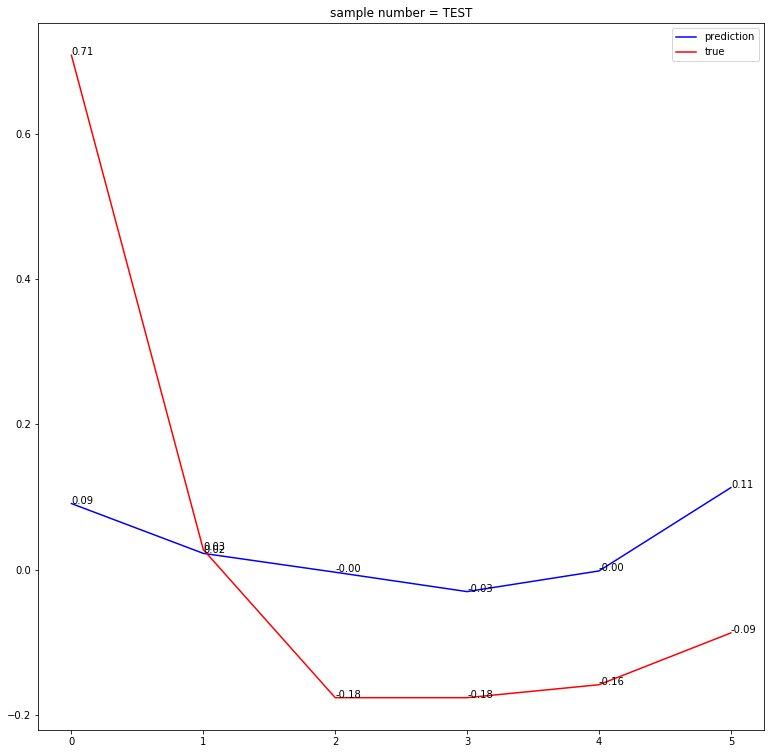

tensor([0.2695, 0.1618, 0.1409, 0.1333, 0.1112, 0.1232], grad_fn=<SelectBackward>)
tensor([-0.2238, -0.2238, -0.2238, -0.2238, -0.2238, -0.2238])
0.269525
0.1617621
0.14088221
0.13331626
0.11123705
0.12317453


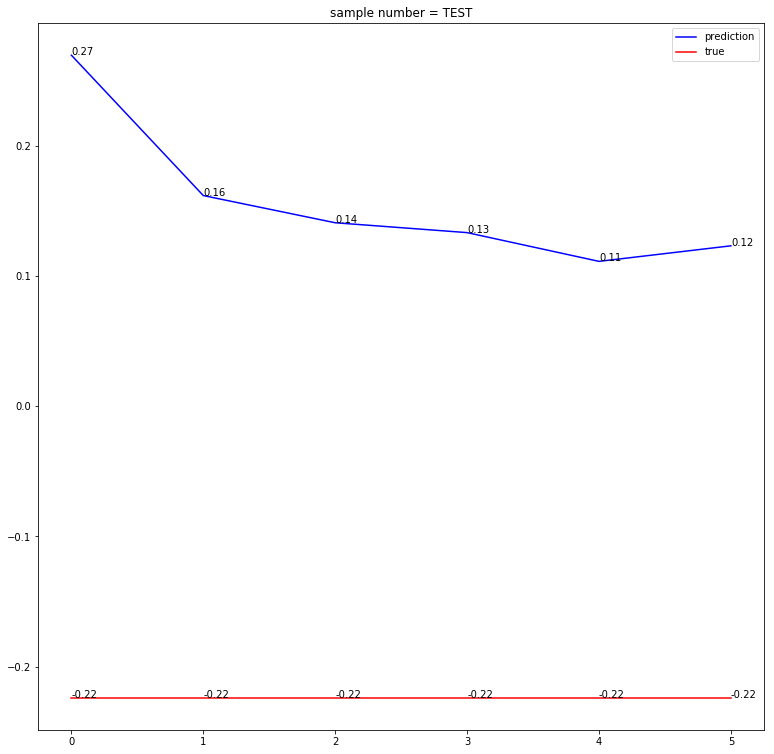

tensor([0.2793, 0.3106, 0.2835, 0.2667, 0.2666, 0.2617], grad_fn=<SelectBackward>)
tensor([-0.1171, -0.0272, -0.1458, -0.1818, -0.0725, -0.1895])
0.27930546
0.31061286
0.28348815
0.26668212
0.2666131
0.26171255


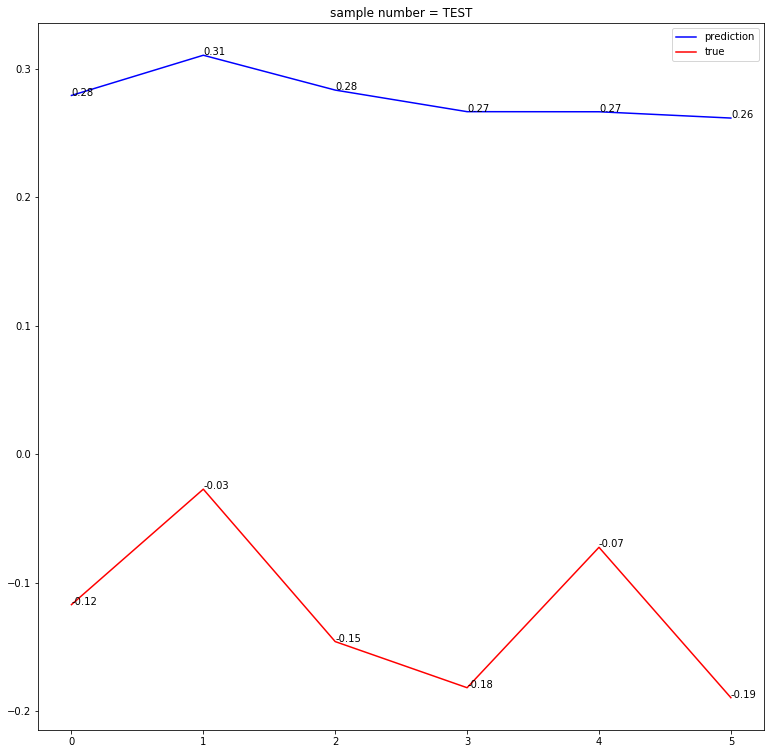

tensor([ 0.1537,  0.0254, -0.0084,  0.0095,  0.0526,  0.1184],
       grad_fn=<SelectBackward>)
tensor([-0.2238, -0.2238, -0.2238, -0.2238, -0.2238, -0.2238])
0.1536968
0.0253596
-0.008366004
0.009490564
0.05260016
0.11840999


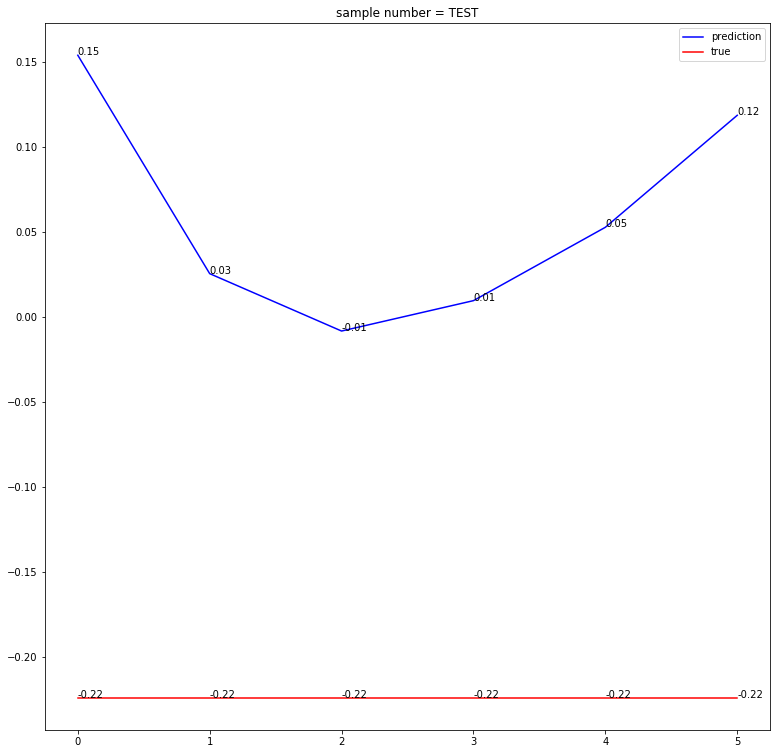

tensor([0.1209, 0.1180, 0.1297, 0.1390, 0.1559, 0.1422], grad_fn=<SelectBackward>)
tensor([-0.1740, -0.1281, -0.1146, -0.1689, -0.1768, -0.1863])
0.12093029
0.118022606
0.1296936
0.13896567
0.15591596
0.14218333


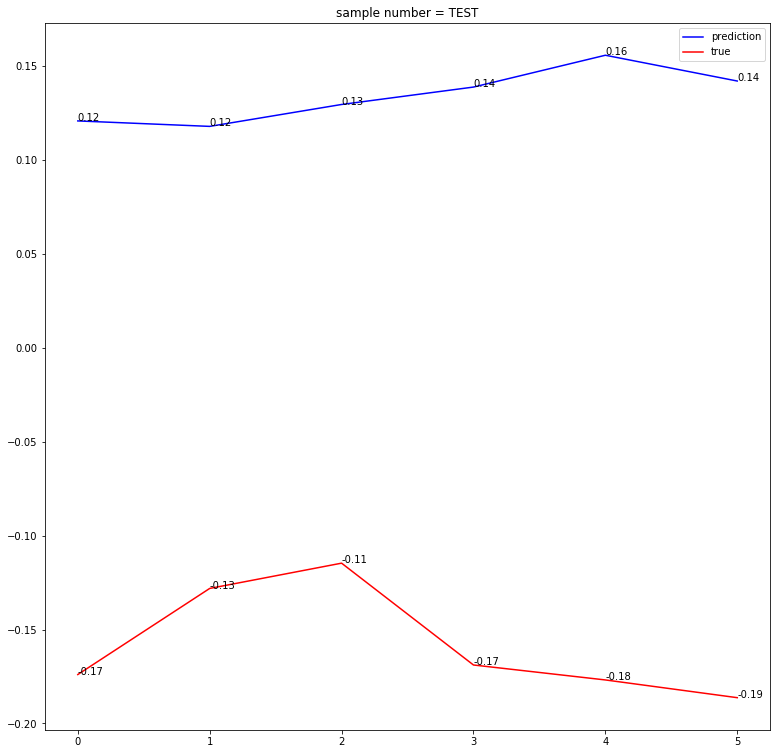

tensor([0.1547, 0.0920, 0.0766, 0.1330, 0.1792, 0.2009], grad_fn=<SelectBackward>)
tensor([-0.2238, -0.2238, -0.2238, -0.2238, -0.2238, -0.2238])
0.15470259
0.09200111
0.07655175
0.13301036
0.17916895
0.2009399


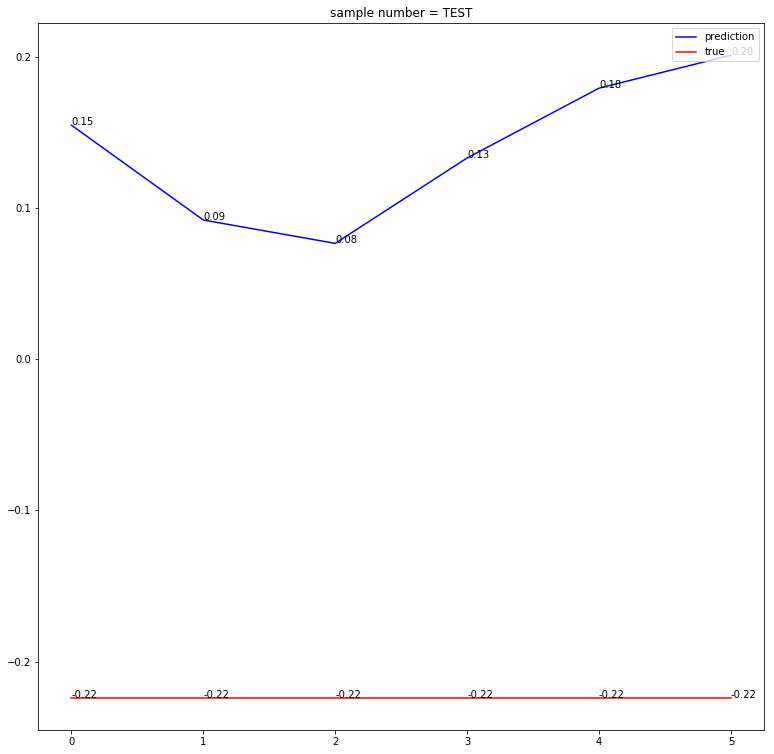

tensor([-0.1188, -0.0840,  0.0057,  0.0307,  0.0794,  0.1671],
       grad_fn=<SelectBackward>)
tensor([-0.2069, -0.2086, -0.2075, -0.2075, -0.2238, -0.2172])
-0.11884065
-0.08403784
0.005685091
0.030735582
0.07938255
0.16707957


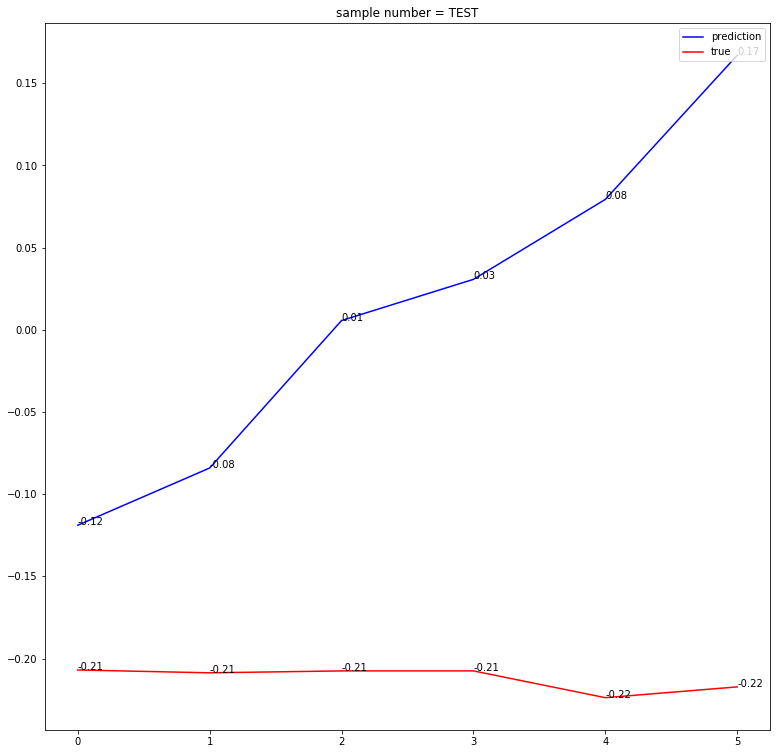

tensor([0.2137, 0.1755, 0.2595, 0.3242, 0.3452, 0.0386], grad_fn=<SelectBackward>)
tensor([-0.1611, -0.1787, -0.0435, -0.0382, -0.2139, -0.1067])
0.21367589
0.17553647
0.2595005
0.32418913
0.34518534
0.0385902


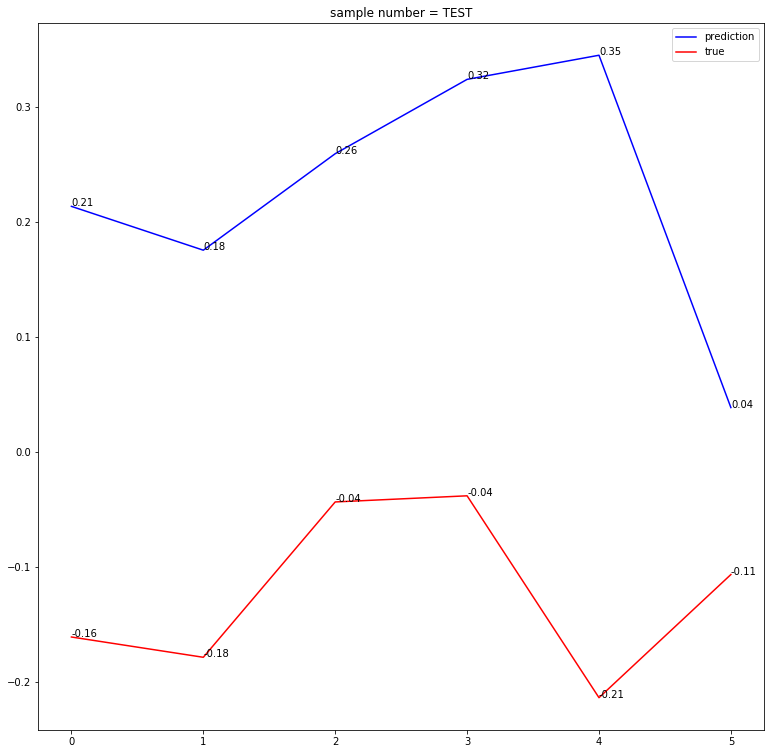

tensor([0.0542, 0.1034, 0.1824, 0.2214, 0.2114, 0.2265], grad_fn=<SelectBackward>)
tensor([-0.1831, -0.0755, -0.1601, -0.0747, -0.1225, -0.1823])
0.054189727
0.10341366
0.18238875
0.22138615
0.21141393
0.22649601


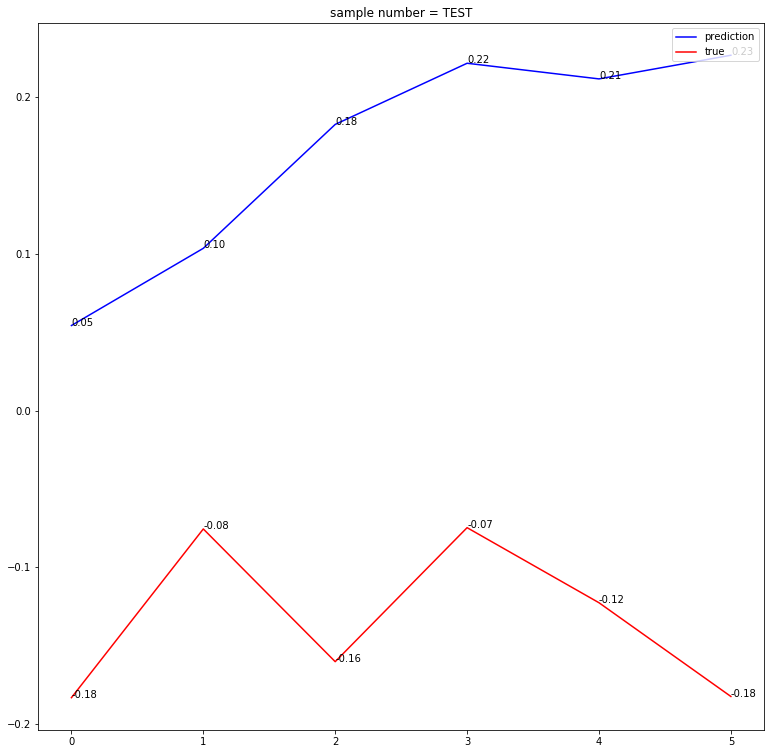

tensor([0.2839, 0.2789, 0.2640, 0.2437, 0.2231, 0.2148], grad_fn=<SelectBackward>)
tensor([-0.0477,  0.1125,  0.3395,  0.0422,  0.2575,  0.2575])
0.28390872
0.2789049
0.26396528
0.24373384
0.2230976
0.21483396


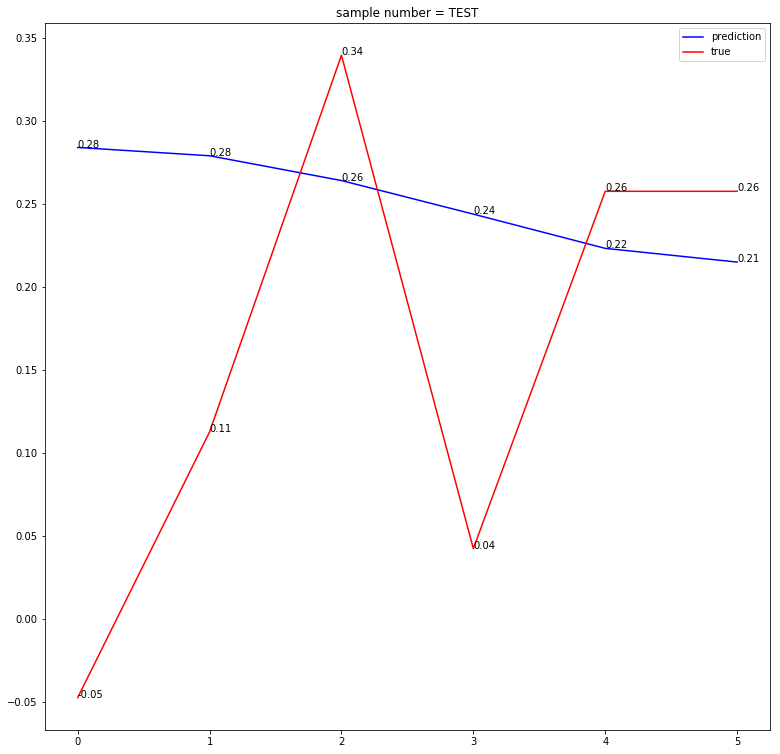

tensor([0.1259, 0.1775, 0.2300, 0.2613, 0.2403, 0.2506], grad_fn=<SelectBackward>)
tensor([-0.2238, -0.2238, -0.1830,  0.1972,  1.1325, -0.2157])
0.12586768
0.17750354
0.2300224
0.26130456
0.24033383
0.25058192


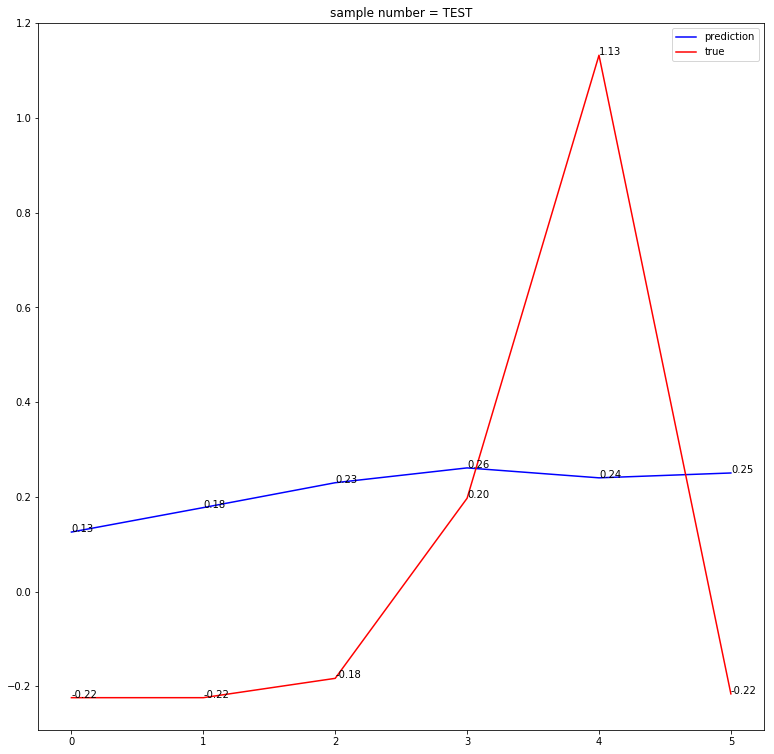

tensor([0.1906, 0.1880, 0.1809, 0.1825, 0.1599, 0.1511], grad_fn=<SelectBackward>)
tensor([-0.1893, -0.2122, -0.2238, -0.2237, -0.2237, -0.2194])
0.19063061
0.18800479
0.18092436
0.18249288
0.15989457
0.15110576


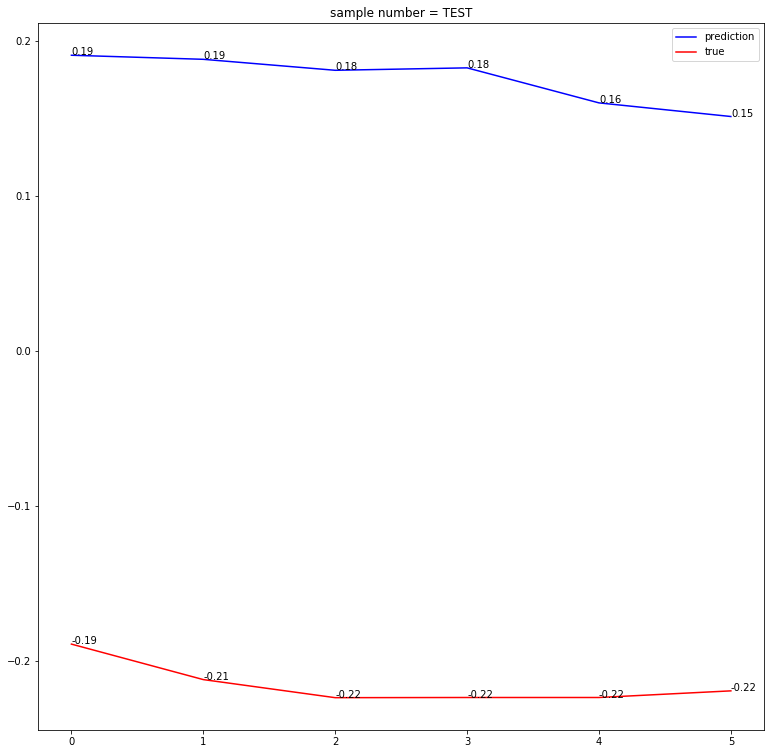

tensor([-0.2137, -0.0775, -0.0284,  0.0436,  0.1404,  0.2212],
       grad_fn=<SelectBackward>)
tensor([-0.1930, -0.1972, -0.2044, -0.2044, -0.1867, -0.1961])
-0.21369268
-0.07751797
-0.028362349
0.043609425
0.1403624
0.221219


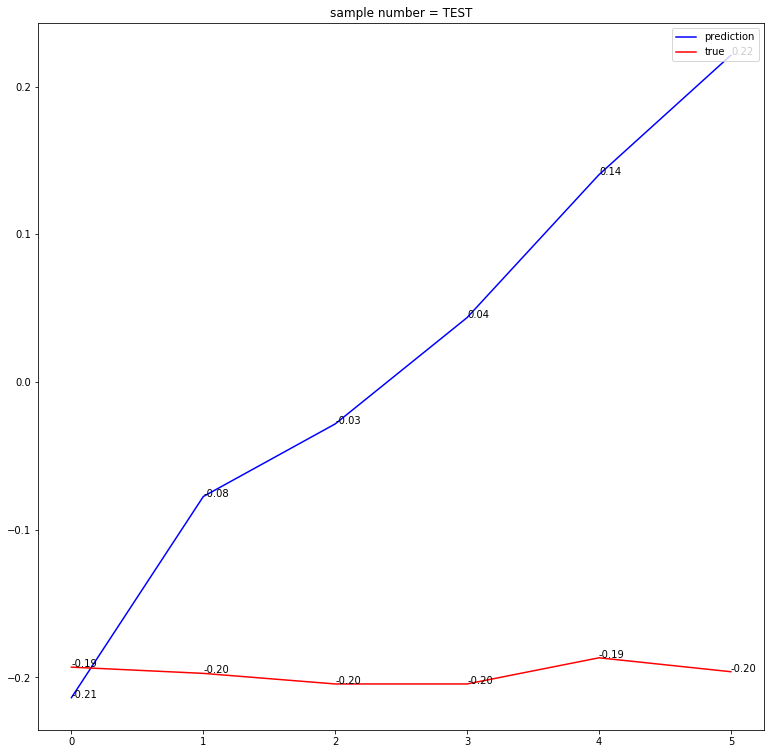

tensor([-0.0431, -0.0082,  0.0730,  0.1408,  0.1804,  0.1932],
       grad_fn=<SelectBackward>)
tensor([ 2.0880, 10.1664,  6.5619,  9.2450,  6.4350,  2.5857])
-0.043118566
-0.008230105
0.0730028
0.14078756
0.18042682
0.19322872


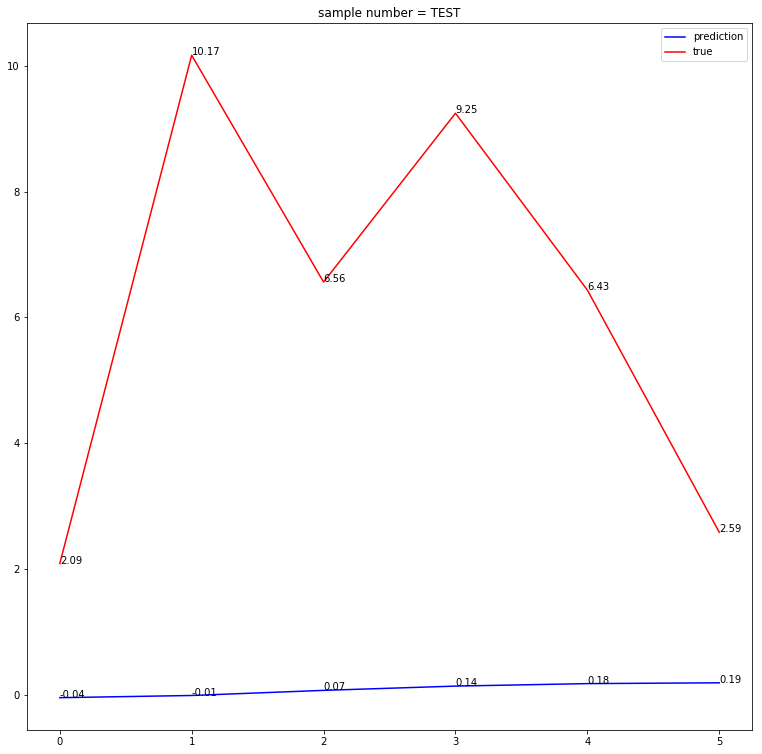

tensor([-0.0735, -0.1363, -0.1856, -0.0016, -0.3130, -0.0469],
       grad_fn=<SelectBackward>)
tensor([-0.2238, -0.2238, -0.2238, -0.2238, -0.2238, -0.2238])
-0.07354216
-0.13631772
-0.18556793
-0.0016382933
-0.31300515
-0.046881214


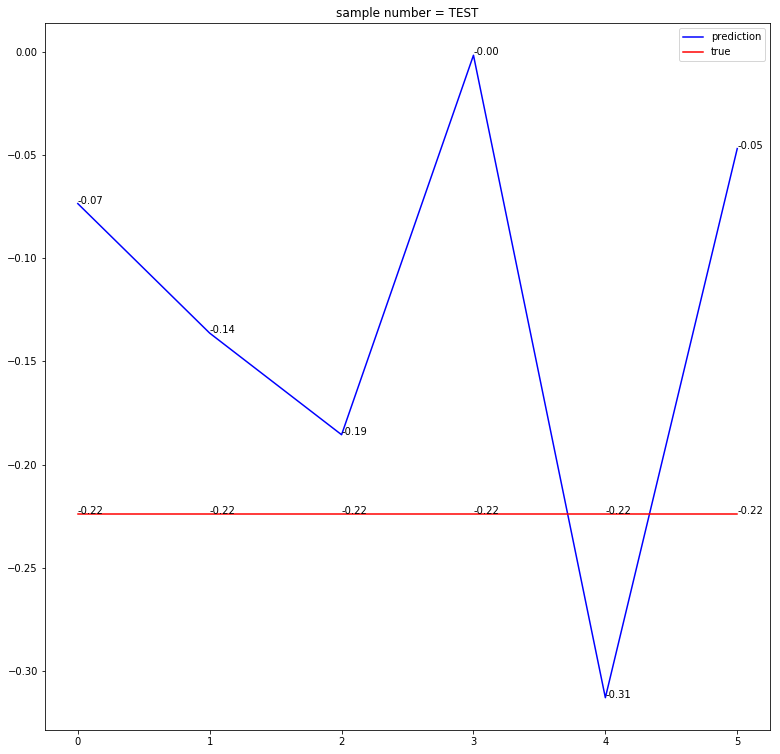

tensor([-0.1295, -0.0117,  0.0475,  0.0207,  0.0084, -0.0029],
       grad_fn=<SelectBackward>)
tensor([-0.2238, -0.2087, -0.2087, -0.2238, -0.2238, -0.2238])
-0.12954362
-0.011691436
0.047499746
0.020671323
0.008428305
-0.0029084384


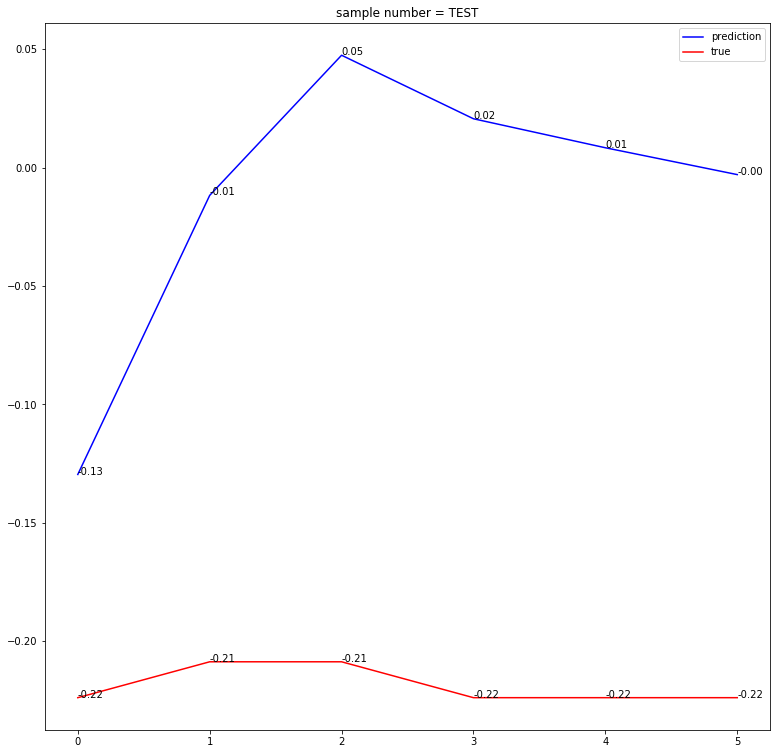

tensor([0.1837, 0.1829, 0.1799, 0.2673, 0.2753, 0.3196], grad_fn=<SelectBackward>)
tensor([ 0.8387, -0.3057,  0.6900,  0.5511,  0.6433,  0.8582])
0.18370393
0.1829018
0.17989838
0.2673147
0.27527356
0.3196252


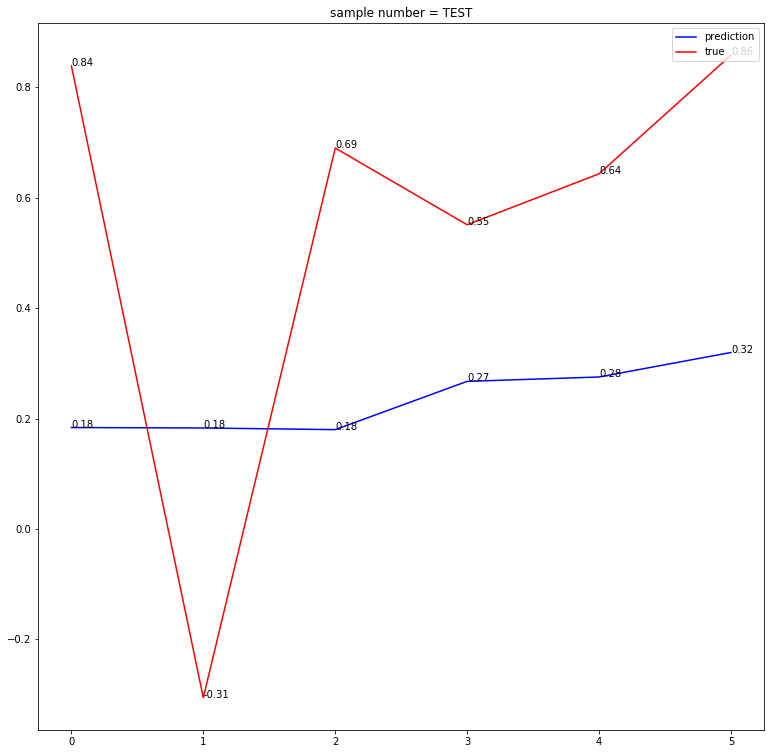

tensor([0.0798, 0.1479, 0.1736, 0.1897, 0.1855, 0.1846], grad_fn=<SelectBackward>)
tensor([-0.2238, -0.2238, -0.2238, -0.2238, -0.2238, -0.2238])
0.07983964
0.14788306
0.17357971
0.18971696
0.1854571
0.18459037


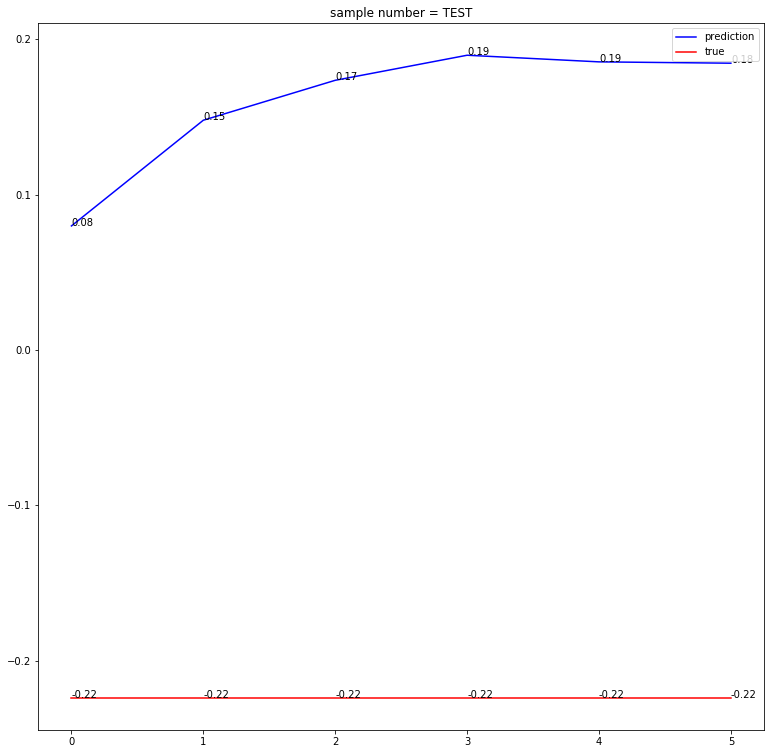

tensor([0.2387, 0.1037, 0.0512, 0.0357, 0.1829, 0.1747], grad_fn=<SelectBackward>)
tensor([-0.2238, -0.2210, -0.2238, -0.2238, -0.2238, -0.2224])
0.23871098
0.10365985
0.05118853
0.035679497
0.1828706
0.1746894


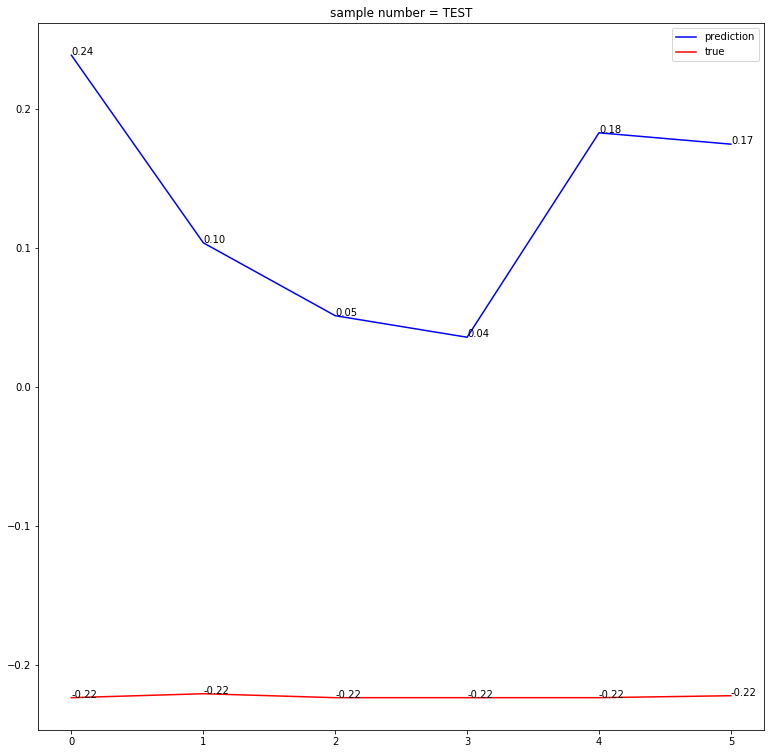

tensor([0.3558, 0.2944, 0.2065, 0.2497, 0.2465, 0.1076], grad_fn=<SelectBackward>)
tensor([-0.0525,  0.0810, -0.2238,  0.0949, -0.0159, -0.0430])
0.35577595
0.29438004
0.20654541
0.24973339
0.24652794
0.10757893


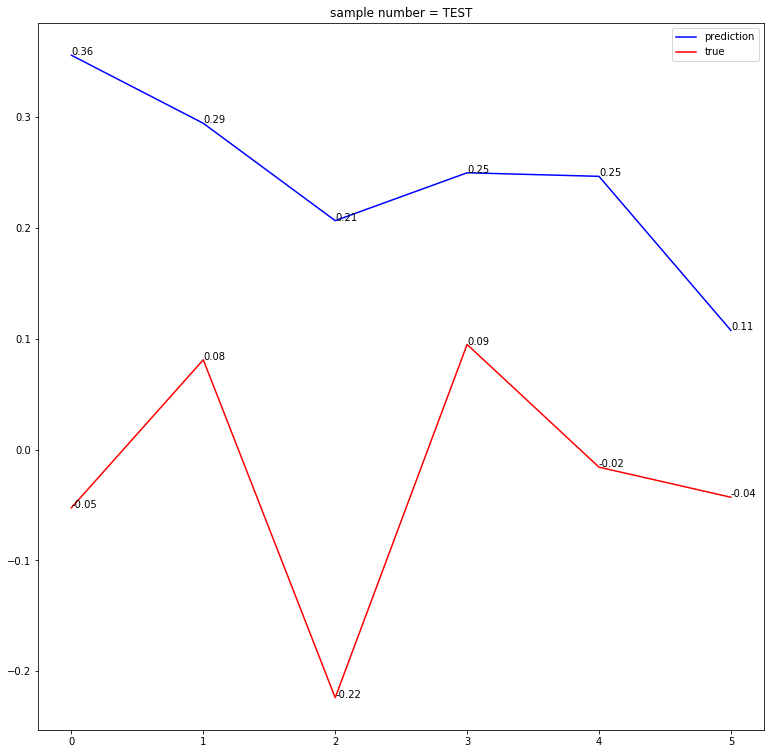

In [36]:
#랜덤하게 10개 선택
# for i in range(10):
#     num = np.random.randint(len(y_test))
#     x = np.arange(10)
#     plt.figure(figsize=(10,10))
#     plt.plot(x, prediction[num].detach().numpy(), 'b')
#     plt.plot(x, y_test[num].values, 'r')
#     plt.legend(['prediction', 'true'],  loc='upper right')
#     plt.title('sample number = {}'.format(num))

#     for a,b in zip(x, prediction[num].detach().numpy()): 
#         #plt.annotate('{0:.2f}'.format(b), xy=(a,b), xytext=(a*1.1, b*1.1))
#         plt.text(a, b, '{0:.2f}'.format(b), fontsize=10)

#     for a,b in zip(x, y_test[num].values): 
#         plt.text(a, b, '{0:.2f}'.format(b), fontsize=10)

#     plt.show()
    
# 출력달 = 9
# x = np.arange(12)

# x_ = np.arange(12)[6:]
# y = np.arange(6)

# plt.figure(figsize=(12,12))
# plt.plot(x_, prediction[출력달].detach().numpy(), 'b')
# plt.plot(x_, y_[출력달].tolist(), 'r')
# plt.plot(x, z[출력달].tolist(), 'y')
# plt.legend(['prediction', 'true'],  loc='upper right')
# plt.title('sample number = {}'.format('TEST'))

# print(y_[출력달])

# for a,b in zip(x, z[출력달].tolist()): 
#     plt.text(a, b, '{0:.2f}'.format(b), fontsize=10)

# for a,b in zip(x_, prediction[출력달].detach().numpy()): 
#     #plt.annotate('{0:.2f}'.format(b), xy=(a,b), xytext=(a*1.1, b*1.1))
#     print(b)
    
#     plt.text(a, b, '{0:.2f}'.format(b), fontsize=10)
    
# for a,b in zip(x_, y_[출력달].tolist()): 
#     plt.text(a, b, '{0:.2f}'.format(b), fontsize=10)

# plt.show()


for i in range(20):
    출력달 = np.random.randint(len(yt_test))

    x = np.arange(6)
    x_ = np.arange(6)
    y = np.arange(6)

    plt.figure(figsize=(13,13))
    plt.plot(x_, prediction[출력달].detach().numpy(), 'b')
    plt.plot(x_, yt_test[출력달].tolist(), 'r')
    # plt.plot(x, z[출력달].tolist(), 'y')
    plt.legend(['prediction', 'true'],  loc='upper right')
    plt.title('sample number = {}'.format('TEST'))


    print(prediction[출력달])

    print(yt_test[출력달])

    # for a,b in zip(x, z[출력달].tolist()): 
    #     plt.text(a, b, '{0:.2f}'.format(b), fontsize=10)

    for a,b in zip(x_, prediction[출력달].detach().numpy()): 
        #plt.annotate('{0:.2f}'.format(b), xy=(a,b), xytext=(a*1.1, b*1.1))
        print(b)

        plt.text(a, b, '{0:.2f}'.format(b), fontsize=10)

    for a,b in zip(x_, yt_test[출력달].tolist()): 
        plt.text(a, b, '{0:.2f}'.format(b), fontsize=10)

    plt.show()

In [ ]:
input_size = 23
hidden_size = 20
output_size = 1
EPOCH = 500

model = GRU(input_size, hidden_size, output_size)

reg = Estimator(model)
reg.compile(optimizer=torch.optim.Adam(model.parameters(), lr=1e-3),
            loss=nn.L1Loss())

train_losses, val_losses = reg.fit(np.array(X_train), np.array(y_train), batch_size=BATCH_SIZE, nb_epoch=EPOCH,
        validation_data=(np.array(X_test), np.array(y_test)))
score= reg.evaluate(np.array(X_test), np.array(y_test))

In [ ]:
import matplotlib.pyplot as plt

length = len(train_losses)

plt.plot(np.arange(length), train_losses, 'r')
plt.plot(np.arange(length), val_losses, 'b')
plt.legend(['train_losses', 'val_losses'],  loc='upper right')

plt.show()

In [ ]:
prediction = reg.predict(X_test).reshape(np.array(y_test).shape)

In [ ]:
for i in range(10):
    num = np.random.randint(len(y_test))
    x = np.arange(10)
    plt.plot(x, prediction[num].detach().numpy(), 'b')
    plt.plot(x, y_test[num].values, 'r')
    plt.legend(['prediction', 'true'],  loc='upper right')
    plt.title('sample number = {}'.format(num))
    plt.show()